In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools

from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression as LR

import matplotlib as mpl
initial_plt_params = dict(mpl.rcParams)
%autoreload 2

In [2]:
def percentify(cm):
    """feed confusion matrix - get percent version"""
    return np.around(np.true_divide(cm, cm.sum(axis=1, keepdims=True))*100, 2)

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          save_as=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`,
    Plot can be saved to 'data/plots/<name>.png' by setting save_as='<name>'
    """
    mpl.rcParams.update(initial_plt_params)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    if save_as:
        plt.savefig('data/plots/{}.png'.format(save_as),
                    bbox_inches='tight')
    plt.show()


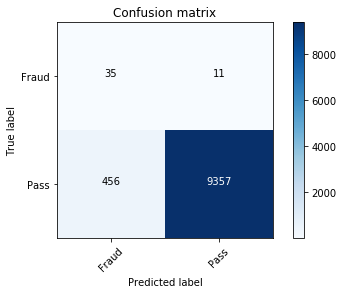

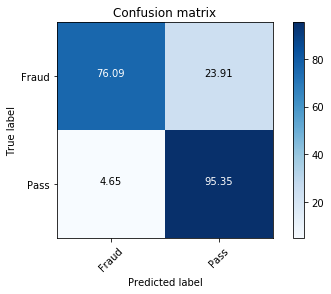

In [3]:
label = ["Fraud","Pass"]
cm = np.array([[35, 11], [456, 9357]])
plot_confusion_matrix(cm, label)
plot_confusion_matrix(percentify(cm), label)

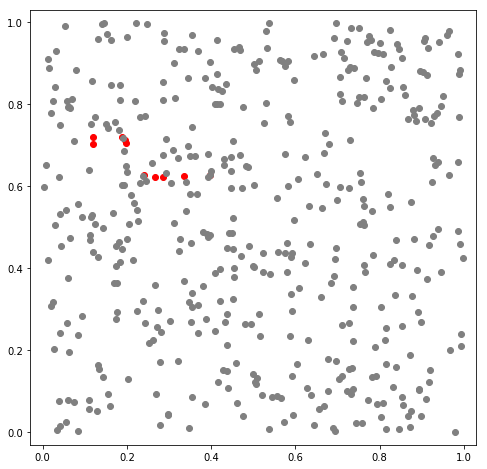

In [4]:
x_yes_1 = np.random.random(10).reshape(-1,2) * np.array([0.2, 0.03]) + np.array([.1, .7])
x_yes_2 = np.random.random(10).reshape(-1,2) * np.array([0.3, 0.03]) + np.array([.12, .6])

x_no = np.random.random(900).reshape(-1,2)

fig, ax = plt.subplots(1,1, figsize=(8, 8))
ax.set_xlim([-0.03, 1.03])
ax.set_ylim([-0.03, 1.03])
ax.scatter(x_yes_1[:,0], x_yes_1[:,1], color="red")
ax.scatter(x_yes_2[:,0], x_yes_2[:,1], color="red")
ax.scatter(x_no[:,0], x_no[:,1], color="gray")
plt.show()

(10, 2)


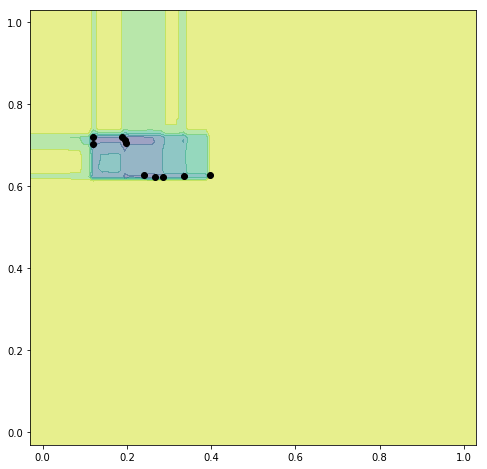

In [5]:
# RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, 
#                        min_samples_split=2, min_samples_leaf=1, 
#                        min_weight_fraction_leaf=0.0, max_features=’auto’, 
#                        max_leaf_nodes=None, min_impurity_decrease=0.0, 
#                        min_impurity_split=None, bootstrap=True, oob_score=False, 
#                        n_jobs=1, random_state=None, verbose=0, warm_start=False, 
#                        class_weight=None)

x_yes = np.concatenate((x_yes_1, x_yes_2), axis=0)
print(x_yes.shape)

x = np.concatenate((x_yes, x_no))
y = np.concatenate((np.ones(x_yes.shape[0]), np.zeros(x_no.shape[0])), axis=0)

rf = RandomForestClassifier(n_estimators=500, 
                            max_depth=5, 
                            class_weight='balanced'
                           )
rf.fit(x, y)


# Plot Model Score Field
xx, yy = np.meshgrid(np.linspace(*ax.get_xlim(), num=100),
                     np.linspace(*ax.get_ylim(), num=100))
Z = rf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,0]
Z_ = (Z).reshape(xx.shape)

plt.figure(figsize=(8,8))
plt.contourf(xx, yy, Z_, 
             alpha=0.5,
             cmap='viridis',             
            )
# plt.imshow(Z_)
plt.scatter(x_yes[:,0], x_yes[:,1], color="black")
plt.show()